## NAIVE BAYES MODEL

__Group: Iñigo Martiarena y Carlos Rodríguez-Viña__

__Lending Club Loan Status Analysis__

### Library

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns


from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.metrics import recall_score, precision_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

### Load Dataset

We load the sample we have created in our notebook called "Sample"

In [2]:
X_ada = pd.read_csv('../data/X_ada.csv', engine = 'python')
y_ada = pd.read_csv('../data/y_ada.csv', engine = 'python')
X_test = pd.read_csv('../data/X_test.csv', engine = 'python')
y_test = pd.read_csv('../data/y_test.csv', engine = 'python')

### Standarization Model


Due to having 58 variables in our dataset, we need to proceed to standarize our data, to ensure uniformity to certain practices within the industry.

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ada= scaler.fit_transform(X_ada)
X_test= scaler.fit_transform(X_test)

# Model

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

In [12]:
gnb = GaussianNB()

In [13]:
gnb.fit(X_ada, y_ada)

GaussianNB()

We proceed with the prediction base on the model we just built, and to calculate the following indicators:

 - Confusion Matrix 
 - Accuracy score. 
 - Recall Score.
 - Precision.
 - Roc Auc score.
 - F1 score
 

In [14]:
y_gnb = gnb.predict(X_test)

### Confussion Matrix

In [15]:
ConfusionMatrix = confusion_matrix(y_test, y_gnb)
ConfusionMatrix

array([[20436,     0],
       [62432,     0]], dtype=int64)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt


ConfusionMatrixDisplay(ConfusionMatrix)

According to our confussion Matrix we can interpretate the following:

 - 20.436 True Negatives. We have predicted "Charged Off" and in real they are "Charged Off".
 - 0 False Positives. We have predicted "Fully Paid" in reality "Charged Off".
 - 62.432 Flase Negatives. We have predicted "Charge Off" in reality "Full Paid".
 - 0 True Postives. We have predicted "Fully Paid" and in real they are "Fully Paid".
 

Of a total sample of 81.890 observations our model has predicted wrong 62.432, which is a 37% of the total

### Accuracy Score

In [17]:
accuracy_score(y_test, y_gnb)

0.24660906501906646

With this model we were able to obtain a 96,77% of accuracy, which means if we have 100 observation we are able to predict altmost 97% right. The issue with this score is when our model is imbalanced, meaning this score can deceive us into believing that a bad model is a good model. So to be certain we are going to use the balanced_accuracy.

In [20]:
balanced_accuracy_score(y_test, y_gnb, sample_weight=None, adjusted=False)

0.5

We can see that our score has drop down to 95%, but still is a pretty great model.

### Recall Score & Precision Score

In [23]:
recall_score(y_test, y_gnb)

0.0

The ratio is number of true positives/(true positives + false negatives), it informs us about the quantity that our model can predict being 1 the best value and 0 the worst values, in our case we have obtain an outstanding result.


We measure the quality of our model, the formula is TruePositive/(TruePositives+FalsePositives)

In [26]:
precision_score(y_test, y_gnb)

0.0

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative being best value 1 and worst value 0.

Because is based on the probability of Bayes this model has no precision or recall score, because it depends on the probability of other outcomes.

__F1 Score__

What if you want to balance the two objectives: high precision and high recall? Or, as a pirate captain, you want to optimize towards capturing treasure and avoiding mutiny? We calculate the F1-score as the harmonic mean of precision and recall to accomplish just that.

In [27]:
from sklearn.metrics import f1_score

def f1score (a, b):
    return (precision_score(y_test, y_gnb)*recall_score(y_test, y_gnb))/(precision_score(y_test, y_gnb)+recall_score(y_test, y_gnb))


In [28]:
f1score(y_test, y_gnb)

nan

As expected this model is not  very useful for us

### ROC AUC Score

The ROC is created by the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning.

In [29]:
roc_auc_score(y_test, y_gnb)

0.5

<IPython.core.display.Javascript object>


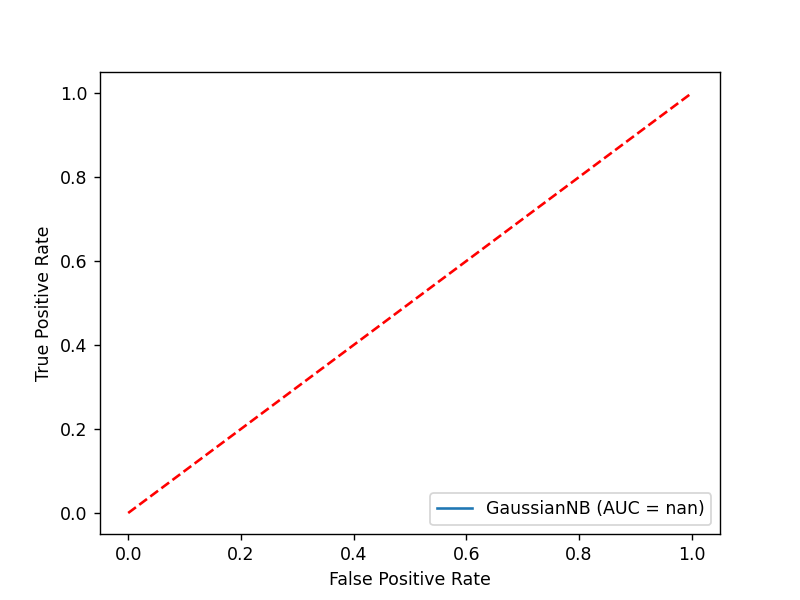

In [30]:
metrics.plot_roc_curve(gnb, y_test, y_gnb)
plt.plot([0, 1], [0, 1], 'r--')

The same result as the F1 score.

### Cumulative Gains Curve

The cumulative gains chart shows the percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases. 

<IPython.core.display.Javascript object>


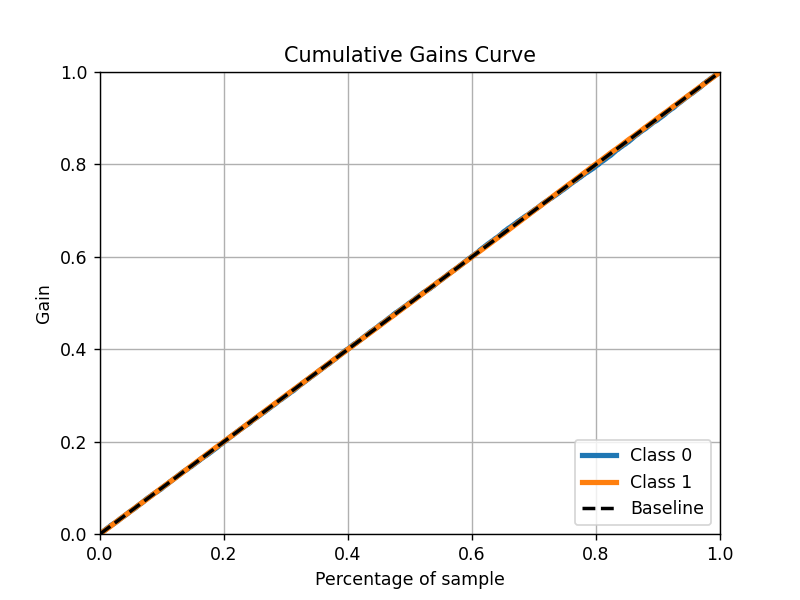

In [31]:
predicted_probabilities = gnb.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)
plt.show()

It is not a good model

### Conclusion

In [32]:
print("The results of our Naive Model")


print("accuracy score", accuracy_score(y_test, y_gnb))
print("balanced accuracy score", balanced_accuracy_score(y_test, y_gnb))
print("recall score", recall_score(y_test, y_gnb))
print("precision score", precision_score(y_test, y_gnb))
print("roc auc score", roc_auc_score(y_test, y_gnb))

The results of our Naive Model
accuracy score 0.24660906501906646
balanced accuracy score 0.5
recall score 0.0
precision score 0.0
roc auc score 0.5


After reviewing several of the results we have concluded the following:

    1) Our dataset is imbalance so the results we have obtain are normal because they are biased.
    2) Our model is so train that the bias affects our results.
    3) During the selection of the variables we have add or remove important variable that affect the results.
    4) We have built a very robust and precise model.

Due to the poor model we are not going to proceed with the hyperparameters.

In [ ]:
pickle.dump(gnb, open("gnb", "wb"))

### References

To built our model we have search many sources of informaction through the internet.

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451 # parameters

https://scikit-learn.org/stable/modules/naive_bayes.html # naive model

https://towardsdatascience.com/tagged/scikit-learn # sk

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf # pipelines

https://medium.com/@benfenison/gridsearching-a-random-forest-classifier-fc225609699c # rf

https://medium.com/fintechexplained/how-to-save-trained-machine-learning-models-649c3ad1c018 # pickle

https://machinelearningmastery.com/rfe-feature-selection-in-python/ # feature engineering

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c # precision and recall

https://towardsdatascience.com/meaningful-metrics-cumulative-gains-and-lyft-charts-7aac02fc5c14 # cumulative gain

https://towardsdatascience.com/evaluate-model-performance-with-cumulative-gains-and-lift-curves-1f3f8f79da01 # cumulative gain

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=true%20positives%20(TP)%3A%20These,they%20do%20have%20the%20disease.&text=false%20positives%20(FP)%3A%20We,actually%20do%20have%20the%20disease. # confusion matrix


https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c# roc curve

